In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('AlgeriaExport.txt', header=None)
df['Year'] = pd.RangeIndex(start=1960, stop=1960+len(df))
df.set_index('Year', inplace=True)
df.columns = ["Export"]
df.head()

,Export
Year,
1960,39.043173
1961,46.244557
1962,19.793873
1963,24.684682
1964,25.084059


In [40]:
train = df.iloc[:45]
test= df.iloc[45:]

<Axes: xlabel='Year'>

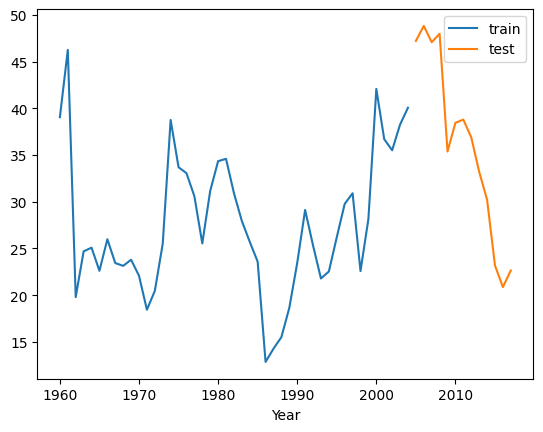

In [41]:
train['Export'].plot(legend=True, label='train')
test['Export'].plot(legend=True, label='test')

In [42]:
train_values = train["Export"].values
alpha = 0.7
l0 = train_values[0]
predicted_train_values = [l0]
for i in range(0, len(train_values-1)):
    predicted_train_values.append(alpha * train_values[i] + (1-alpha) * predicted_train_values[i])

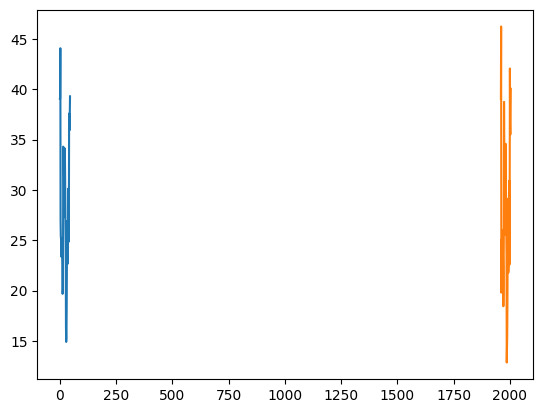

In [43]:
plt.plot(predicted_train_values)
plt.plot(train)

In [26]:
def ses(train_values,alpha,l0):
    predicted_train_values=[l0]
    for i in range (0,len(train_values-1)):
        predicted_train_values.append(alpha+train_values[i] + (1-alpha) *predicted_train_values[i])
    return predicted_train_values

In [27]:
ptv = ses(train_values, 0.7, train_values[0])

In [28]:
def sse(values,predictions):
    sum=0
    for i in range(len(values)):
        sum+=(values[i]-predictions[i])**2
    return sum

In [29]:
sse(train_values,predicted_train_values)

9383.876814408826

In [30]:
def ses_fit(train_values, dalpha):
    l0=train_values[0]
    alpha_grid = np.arange(0,1,dalpha)
    sse_list=[]
    for alpha in alpha_grid:
        predicted_train_values=ses(train_values,alpha,l0)
        sse_list.append(sse(train_values,predicted_train_values))
    min_index = min(enumerate(sse_list), key= lambda x: x[1])[0]
    best_alpha = alpha_grid[min_index]
    
    return best_alpha

In [31]:
alpha = ses_fit(train_values, 0.01)
print(alpha)

0.99


In [32]:
def ses_predict(train_values, alpha,l0,h):
    predicted_train_values=ses(train_values,alpha,l0)
    one_step = alpha*train_values[-1]+(1-alpha)*predicted_train_values[-1]
    h_steps = [one_step]*h
    return one_step,h_steps,predicted_train_values

In [33]:
one_step,h_steps,predicted_train_values = 

SyntaxError: invalid syntax (1367620753.py, line 1)

In [ ]:
def calc_forecast(alfa, data):
    forecasts = []
    forecasts.append(data.iloc[0]['Export'])   # y1
    for i in range(1, len(data)):
        yt = data.iloc[i]['Export']
        forecast = alfa * yt + (1 - alfa) * forecasts[i-1]
        forecasts.append(forecast)
    sse = np.sum((data['Export'].values - forecasts) ** 2)
    return forecasts, sse

In [ ]:
forecasts, sse = calc_forecast(0.8, train_data)
forecasts = pd.Series(forecasts, index=train_data.index)
train_data['Export'].plot(legend=True, label='train')
test_data['Export'].plot(legend=True, label='test')
forecasts.plot(legend=True, label='forecast', color='red')
print(f"SSE: {sse}")

In [ ]:
forecasts, sse = calc_forecast(0.4, train_data)
forecasts = pd.Series(forecasts, index=train_data.index)
train_data['Export'].plot(legend=True, label='train')
test_data['Export'].plot(legend=True, label='test')
forecasts.plot(legend=True, label='forecast', color='red')
print(f"SSE: {sse}")

In [ ]:
forecasts, sse = calc_forecast(0.99, train_data)
forecasts = pd.Series(forecasts, index=train_data.index)
train_data['Export'].plot(legend=True, label='train')
test_data['Export'].plot(legend=True, label='test')
forecasts.plot(legend=True, label='forecast', color='red')
print(f"SSE: {sse}")